### Download the rvl_cdip Dataset: https://huggingface.co/datasets/aharley/rvl_cdip 


#### Reference:
Adam W Harley, Alex Ufkes, & Konstantinos G Derpanis 2015. Evaluation of Deep Convolutional Nets for Document Image Classification and Retrieval. https://huggingface.co/datasets/aharley/rvl_cdip 


In [16]:
from datasets import load_dataset
from tqdm import tqdm
import itertools
import matplotlib.pyplot as plt

import numpy as np
import cv2
from PIL import Image
from huggingface_hub import snapshot_download

import os
import csv
import tarfile


In [3]:
local_dir = "./Data/rvl_cdip_raw"

# Download the full snapshot of the repo
snapshot_download(
    repo_id="aharley/rvl_cdip",
    repo_type="dataset",
    local_dir=local_dir,
    local_dir_use_symlinks=False  # set to True if you want symlinks instead of full copies
)

c:\Users\tyler\anaconda3\envs\PageDewarp\Lib\site-packages\huggingface_hub\file_download.py:933: UserWarning: `local_dir_use_symlinks` parameter is deprecated and will be ignored. The process to download files to a local folder has been updated and do not rely on symlinks anymore. You only need to pass a destination folder as`local_dir`.
For more details, check out https://huggingface.co/docs/huggingface_hub/main/en/guides/download#download-files-to-local-folder.
  warnings.warn(


Fetching 8 files:   0%|          | 0/8 [00:00<?, ?it/s]

rvl-cdip.tar.gz:   0%|          | 0.00/38.8G [00:00<?, ?B/s]

test.txt:   0%|          | 0.00/1.72M [00:00<?, ?B/s]

.gitattributes:   0%|          | 0.00/1.65k [00:00<?, ?B/s]

val.txt:   0%|          | 0.00/1.72M [00:00<?, ?B/s]

train.txt:   0%|          | 0.00/13.7M [00:00<?, ?B/s]

'D:\\Public\\Page-Dewarp\\SyntheticData\\Data\\rvl_cdip_raw'

In [19]:
tarGzPath = os.path.join(local_dir, "data/rvl-cdip.tar.gz")

with tarfile.open(tarGzPath, "r:gz") as tar:
    tar.extractall(path=local_dir)
print(f"Extracted {tarGzPath} to {local_dir}")

Extracted ./Data/rvl_cdip_raw\data/rvl-cdip.tar.gz to ./Data/rvl_cdip_raw


In [43]:
labels = {
    0: "letter",
    1: "form",
    2: "email",
    3: "handwritten",
    4: "advertisement",
    5: "scientific report",
    6: "scientific publication",
    7: "specification",
    8: "file folder",
    9: "news article",
    10: "budget",
    11: "invoice",
    12: "presentation",
    13: "questionnaire",
    14: "resume",
    15: "memo"
}

In [44]:
# Read the first 3 lines from the CSV file
dataSet = []
images_dir = os.path.join(local_dir, "data/train.txt")

with open(images_dir, 'r') as f:
    reader = csv.reader(f, delimiter=" ")
    for idx, row in enumerate(reader):
        if idx < 3:  
            dataSet.append({"image": row[0], "label": row[1]})
        else:
            break

./Data/rvl_cdip_raw\images/imagesq/q/o/c/qoc54c00/80035521.tif
./Data/rvl_cdip_raw\images/imagese/e/w/c/ewc23d00/513280028.tif
./Data/rvl_cdip_raw\images/imagesw/w/b/t/wbt26e00/2053453161.tif


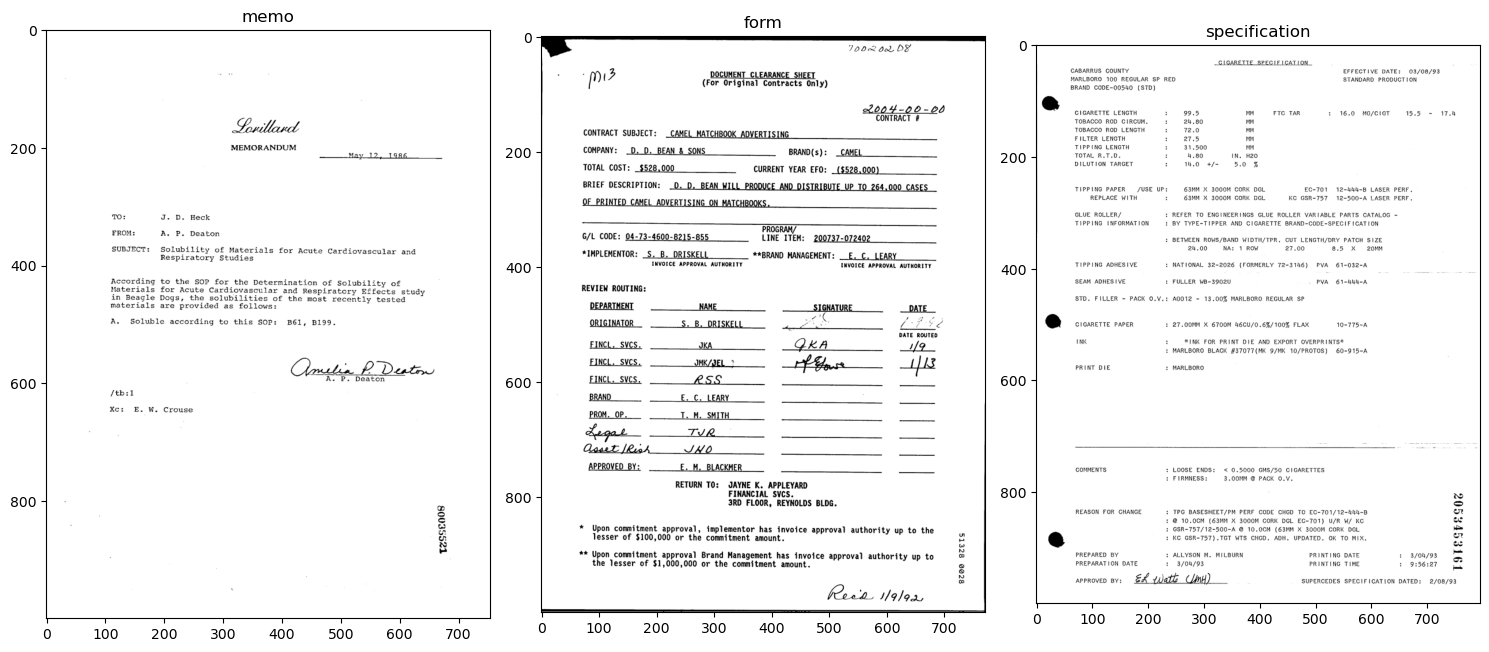

In [50]:
fig, axs = plt.subplots(1, 3, figsize=(15, 8))

for idx, sample  in enumerate(dataSet):

    image_path = os.path.join(local_dir, f"images/{sample['image']}" )
    print(image_path)
    image = Image.open(image_path)
    label = sample["label"]
    axs[idx].imshow(image, cmap="gray")
    axs[idx].set_title(f"{labels[int(label)]}")


plt.tight_layout()
plt.show()